In [28]:
import pandas as pd   # linear algebra
import numpy as np    # data processing, CSV file I/O like (pd.read_csv)
import seaborn as sns  # for data visuvalization
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# Avoid Warning
import warnings
warnings.filterwarnings("ignore")

## 1. Data Preprocessing and Missing Value Analysis

In [23]:
file_path = 'Fish.csv'
df = pd.read_csv(file_path)
df.head()  # Display first few rows
 

,Weight,Length,Height,Width,Price
0,200.0,50.0,3.0,10.0,150
1,200.0,50.0,3.0,10.0,150
2,200.0,50.0,3.0,10.0,150
3,200.0,50.0,3.0,10.0,150
4,200.0,50.0,3.0,10.0,150


In [24]:
print("\n=> summary information of the DataFrame\n")
df.info()
df.shape # will show the dimensions of the data set


=> summary information of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  156 non-null    float64
 1   Length  155 non-null    float64
 2   Height  154 non-null    float64
 3   Width   156 non-null    float64
 4   Price   159 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.3 KB


(159, 5)

In [42]:
# Checking for NaN Values in data frame
print("\nMissing Values in Each Column:")
df.isnull().sum()


Missing Values in Each Column:


Weight    0
Length    0
Height    0
Width     0
Price     0
dtype: int64

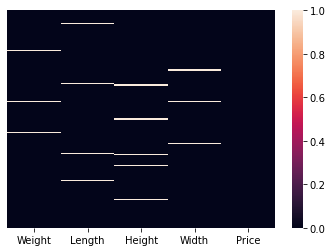

In [26]:
sns.heatmap(df.isnull(), yticklabels=False);

In [36]:
# Handiling missing values 
df.fillna(df.mean(), inplace=True)  # Mean imputation

Weight    0
Length    0
Height    0
Width     0
Price     0
dtype: int64

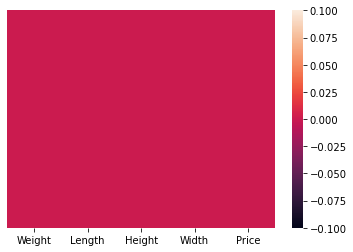

In [39]:
sns.heatmap(df.isnull(), yticklabels=False);
df.isnull().sum()

In [40]:
# Normalize the dataset
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Normalized Data:\n", data_normalized.head())

Normalized Data:
    Weight  Length  Height  Width  Price
0     0.0     0.0     0.0    1.0    0.0
1     0.0     0.0     0.0    1.0    0.0
2     0.0     0.0     0.0    1.0    0.0
3     0.0     0.0     0.0    1.0    0.0
4     0.0     0.0     0.0    1.0    0.0


#### Normalization scales features to a uniform range, usually [0, 1]. This is crucial when features have different scales or units. For example, Weight might be in kilograms, while Price is in dollars. Normalization ensures that no feature dominates due to its scale.

#### Using MinMaxScaler to scale features to the range [0, 1]. This step is essential for ensuring all features contribute equally and that machine learning algorithms perform optimally.

#### we can ensure that your dataset is properly preprocessed, making it ready for accurate and effective analysis or modeling.

## 2. Exploratory Data Analysis (EDA) 

In [44]:
# Summary statistics
summary = df.describe()
print("Summary Statistics:\n", summary)

# Count of each unique value in 'Price' column (assuming it's our species equivalent)
species_count = df['Price'].value_counts()
print("Count of Each Price:\n", species_count)


Summary Statistics:
            Weight      Length      Height       Width       Price
count  152.000000  152.000000  152.000000  152.000000  152.000000
mean   471.184211   58.914474    4.700680    7.644667  344.078947
std    128.881763    8.899694    1.078477    1.537028  171.728090
min    200.000000   50.000000    3.000000    5.000000  150.000000
25%    437.500000   55.000000    4.000000    6.700000  150.000000
50%    490.000000   55.000000    4.700680    8.200000  350.000000
75%    550.000000   59.000000    5.425000    8.400000  450.000000
max    700.000000   86.000000    7.000000   10.000000  800.000000
Count of Each Price:
 Price
150    52
450    52
280    17
550    14
350    10
800     6
340     1
Name: count, dtype: int64


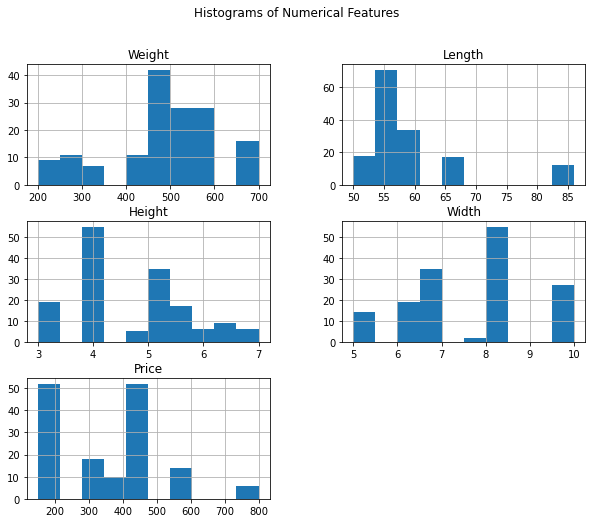

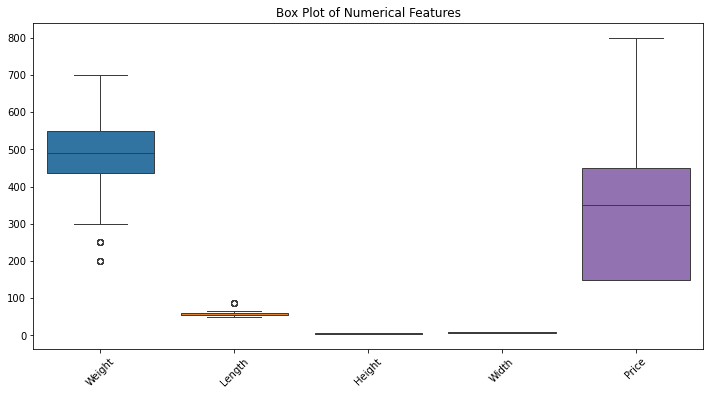

In [57]:
# Histograms for numerical features
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Box plot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)   
plt.show()


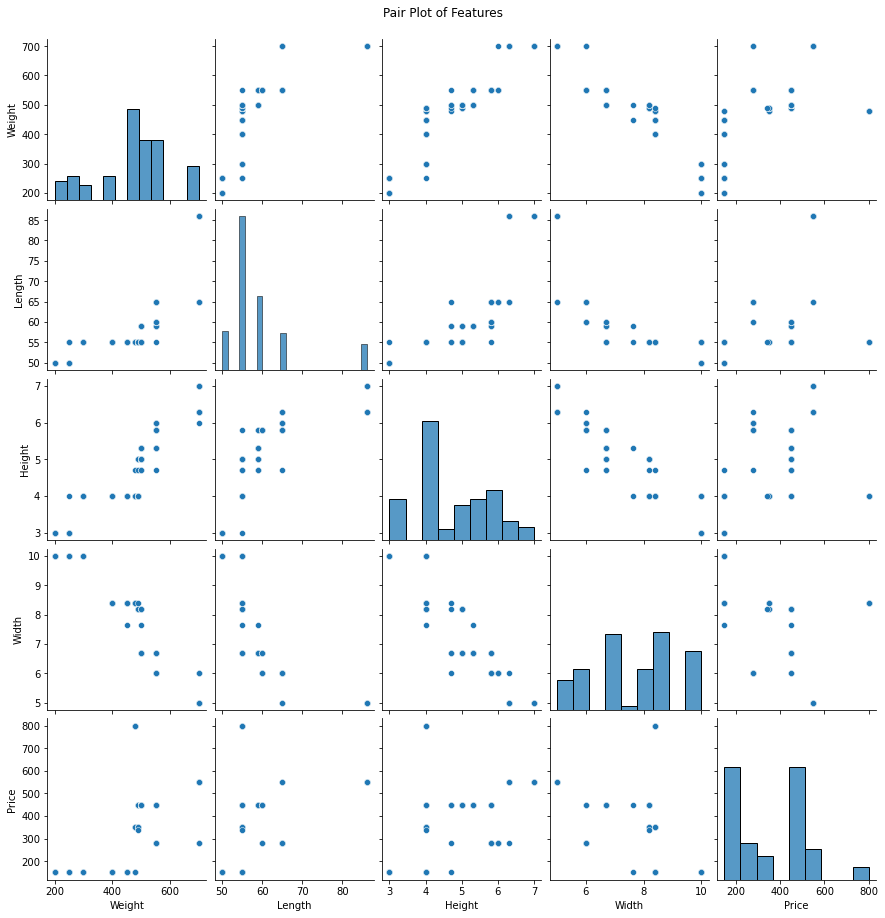

In [55]:
# Scatter plot matrix to explore relationships
sns.pairplot(df)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

## 3. Feature Selection and Engineering

Correlation Matrix:
           Weight    Length    Height     Width     Price
Weight  1.000000  0.773365  0.892779 -0.924488  0.649805
Length  0.773365  1.000000  0.813286 -0.794319  0.442084
Height  0.892779  0.813286  1.000000 -0.941174  0.540180
Width  -0.924488 -0.794319 -0.941174  1.000000 -0.567441
Price   0.649805  0.442084  0.540180 -0.567441  1.000000


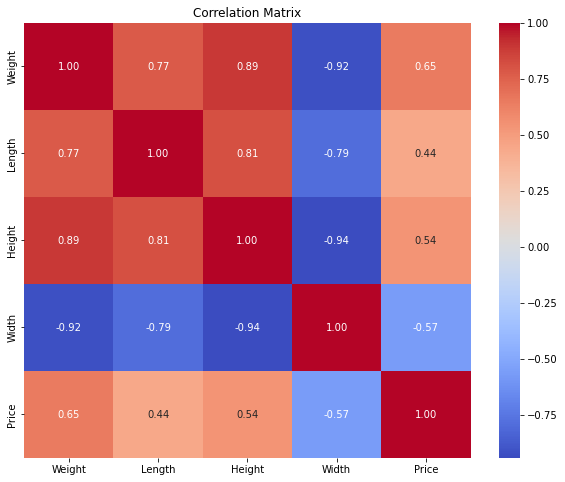

In [50]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

print("Correlation Matrix:\n", correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [58]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



Training set size: (121, 4)
Testing set size: (31, 4)


## Initialize and Train the Model

In [59]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

## Evaluate the Model

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display the coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")



Evaluation Metrics:
Mean Squared Error: 11967.597439460686
R-squared: 0.5521924906620934

Model Coefficients:
Intercept: -55.36138302542156
Coefficients: [  1.08092849  -1.65707905 -10.71550737   5.22574682]


## Make Predections

In [ ]:
# Example new fish data (replace with actual values)
new_fish_data = pd.DataFrame({
    'Length': [30],  # Length in cm
    'Weight': [500],  # Weight in grams
    'Species_X': [1],  # Assume species 'X' was one of the one-hot encoded species
    'Species_Y': [0]   # Assume species 'Y' was another one
})

# Predict the price of the new fish
predicted_price = model.predict(new_fish_data)
print("\nPredicted Price for New Fish:")
print(predicted_price)

In [64]:
# Predicting new data
# Create new fish data
new_fish_data = pd.DataFrame({
    'Length': [30],
    'Weight': [500],
    'Species_X': [1],  # Assuming species X was one-hot encoded
    'Species_Y': [0]   # Assuming species Y was one-hot encoded
})

# Ensure the new data matches the training data columns
# Add missing columns with default values if necessary
for column in X.columns:
    if column not in new_fish_data.columns:
        new_fish_data[column] = 0

# Reorder columns to match training data
new_fish_data = new_fish_data[X.columns]

# Predict the price of the new fish
predicted_price = model.predict(new_fish_data)
print("\nPredicted Price for New Fish:")
print(predicted_price)



Predicted Price for New Fish:
[435.39049021]
